In [24]:
## libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
import mplcursors
import csv, pandas as pd
from datetime import datetime, timedelta

In [25]:
# files
roadTrafficFiles=['road_traffic_full.csv']

roadTrafficPath='./Road Traffic/'

filepath = roadTrafficPath+roadTrafficFiles[0]

formats = ['%Y-%m-%dT%H:%M:%S', '%m/%d/%Y %H:%M:%S', '%d/%m/%Y %H:%M:%S', '%d/%m/%Y %H:%M']

datetimeFormat = formats[3]

In [26]:
df = pd.DataFrame([], columns=['case', 'activity', 'time'])
# https://stackoverflow.com/questions/11622652/large-persistent-dataframe-in-pandas
tp = pd.read_csv(filepath, iterator=True, chunksize=1000)  # gives TextFileReader, which is iterable with chunks of 1000 rows.
df = pd.concat(tp, ignore_index=True)  # df is DataFrame. If errors, do `list(tp)` instead of `tp`
# with open(filepath) as csv_file:
#     csv_reader = csv.reader(csv_file, delimiter=',')
#     line_count = 0
#     header = []
#     for row in csv_reader:
#         if line_count == 0:
#             line_count += 1
#             header = row
#             #print("Headers: ", row)
#         else:
#             df = df.append(pd.DataFrame([row], columns=header),ignore_index=True)
#             line_count += 1
#print(df.info())
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561470 entries, 0 to 561469
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   case      561470 non-null  object
 1   activity  561470 non-null  object
 2   time      561470 non-null  object
dtypes: object(3)
memory usage: 12.9+ MB
None


In [27]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561470 entries, 0 to 561469
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   case      561470 non-null  object
 1   activity  561470 non-null  object
 2   time      561470 non-null  object
dtypes: object(3)
memory usage: 12.9+ MB
None


In [28]:
df.head()

,case,activity,time
0,A1,Create Fine,01/01/2000 00:00
1,A1,Send Fine,02/01/2000 00:00
2,A100,Create Fine,02/01/2000 00:00
3,A100,Send Fine,02/01/2000 00:00
4,A100,Insert Fine Notification,02/01/2000 00:00


In [29]:
##Sorting DataFrame by Case then Time.
df = df.sort_values(['case','time'], ascending=[True, True])
# print(df)


In [89]:

#minute or Hour?
# minuteFlag = True
# divisor = 60 if minuteFlag else 3600
# timeLabel = 'Time (Minutes)' if minuteFlag else'Time (Hour)'

divisor = 1
timeLabel = 'Time (Seconds)'

## group by case
listA = df.groupby(["case"])
links__ = []
timediff__ = []
for cases in df['case'].unique():
    temp__ = []
    time__ = []
    temp__.append(listA.get_group(cases)["activity"])
    time__.append(listA.get_group(cases)["time"]) 
    for idx, val in temp__[0].iteritems():
        nextIndex = idx +1
        if nextIndex not in temp__[0].index:
            break
        else:
            links__.append({"source": val, "target": temp__[0][nextIndex]})
    for idx, val in time__[0].iteritems():
        nextIndex = idx +1
        if nextIndex not in time__[0].index:
            break
        else:
            timeDiffTemp__ = datetime.strptime(time__[0][nextIndex],datetimeFormat) - datetime.strptime(val,datetimeFormat)
            timediff__.append({"time": timeDiffTemp__.total_seconds()/divisor})

print('####')

####


In [90]:
for index, row in df.iterrows():
    nextIndex = index +1
    if (df['case'][index] != df['case'][nextIndex]):
        break
    else:
        timeDifference = datetime.strptime(df['time'][nextIndex],datetimeFormat) - datetime.strptime(df['time'][index],datetimeFormat)
        

In [91]:
for val in range(0,len(links__)):    
    links__[val].update(timediff__[val])
    links__[val].update({'edge': links__[val]['source']+'>'+links__[val]['target']})
# print()

In [92]:
link = pd.DataFrame(links__)
# print(links__)
link.head()

,source,target,time,edge
0,Create Fine,Send Fine,86400.0,Create Fine>Send Fine
1,Create Fine,Send Fine,0.0,Create Fine>Send Fine
2,Send Fine,Insert Fine Notification,0.0,Send Fine>Insert Fine Notification
3,Insert Fine Notification,Add penalty,86400.0,Insert Fine Notification>Add penalty
4,Add penalty,Send for Credit Collection,0.0,Add penalty>Send for Credit Collection


In [93]:
print('###### Before Filtering Statistics : ')
print(link['time'].describe())

###### Before Filtering Statistics : 
count    410829.000000
mean        743.012786
std        8005.028684
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      259200.000000
Name: time, dtype: float64


In [94]:
# groupedMean = link.groupby(['source', 'target'], as_index=False)['time'].mean()
groupedMean = link.groupby(['edge'], as_index=False)['time'].mean()
print(groupedMean)

                                                 edge         time
0                         Add penalty>Appeal to Judge     0.000000
1        Add penalty>Insert Date Appeal to Prefecture   263.414634
2        Add penalty>Notify Result Appeal to Offender     0.000000
3                                 Add penalty>Payment   677.537867
4   Add penalty>Receive Result Appeal from Prefecture   984.615385
..                                                ...          ...
65         Send Fine>Insert Date Appeal to Prefecture  1609.937888
66                 Send Fine>Insert Fine Notification   754.670381
67                                  Send Fine>Payment   890.181818
68                Send Fine>Send Appeal to Prefecture     0.000000
69  Send for Credit Collection>Send Appeal to Pref...  5400.000000

[70 rows x 2 columns]


In [95]:
# groupedMedian = link.groupby(['source', 'target'], as_index=False)['time'].median()
groupedMedian = link.groupby(['edge'], as_index=False)['time'].median()
print(groupedMedian)

                                                 edge  time
0                         Add penalty>Appeal to Judge   0.0
1        Add penalty>Insert Date Appeal to Prefecture   0.0
2        Add penalty>Notify Result Appeal to Offender   0.0
3                                 Add penalty>Payment   0.0
4   Add penalty>Receive Result Appeal from Prefecture   0.0
..                                                ...   ...
65         Send Fine>Insert Date Appeal to Prefecture   0.0
66                 Send Fine>Insert Fine Notification   0.0
67                                  Send Fine>Payment   0.0
68                Send Fine>Send Appeal to Prefecture   0.0
69  Send for Credit Collection>Send Appeal to Pref...   0.0

[70 rows x 2 columns]


In [96]:
## let us define a delta to check if the process has sub-divisions based on the time duration
# time in minutes/seconds; check minuteFlag section
timeDeltaCheck = 0
# link = link[(link['time'] > timeDeltaCheck)]
# 
for index, row in link.iterrows():
    if (row['time'] == timeDeltaCheck):
        match = (groupedMean['edge'] == row['edge'])
        link['time'][index] = groupedMean['time'][match]

c:\users\ayadi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [97]:
print('######')
print(link['time'].describe())

######
count    410829.000000
mean       1479.427731
std        7937.785577
min           0.000000
25%         723.157589
50%         746.111100
75%         754.670381
max      259200.000000
Name: time, dtype: float64


In [98]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
# plt.figure(figsize=(8,3))
# figA = sns.boxplot(x=link['source'], y=link['time'])
# plt.show()
# figB = sns.boxplot(x=link['target'], y=link['time'])
# plt.show()
# hue=link['edge'],

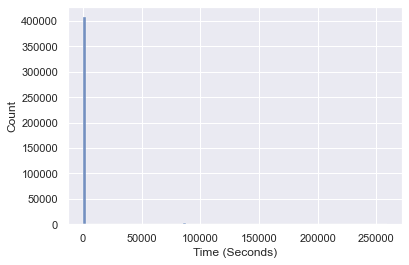

In [99]:
figX = sns.histplot(x=link['time'], stat="count", bins=100)
figX.set(xlabel=timeLabel)
plt.show()

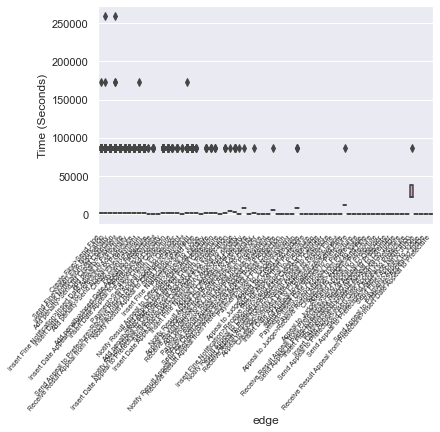

In [100]:
figC = sns.boxplot(x=link['edge'], y=link['time'])
plt.xticks(rotation=50, ha="right", fontsize=7)
figC.set(ylabel=timeLabel)
hoverText = mplcursors.cursor(figC, hover=True)
# hoverText.connect("add", lambda sel: sel.annotation.set_text(
#     'Edge {},{}'.format(link['edge'][sel.target[0]], sel.target[1])))
plt.show()

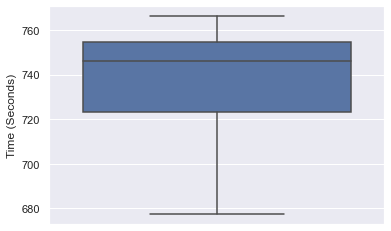

In [101]:
figBox = sns.boxplot(y=link['time'], showfliers=False)
plt.xticks(rotation=50, ha="right", fontsize=7)
figBox.set(ylabel=timeLabel)
hoverText = mplcursors.cursor(figBox, hover=True)
plt.show()

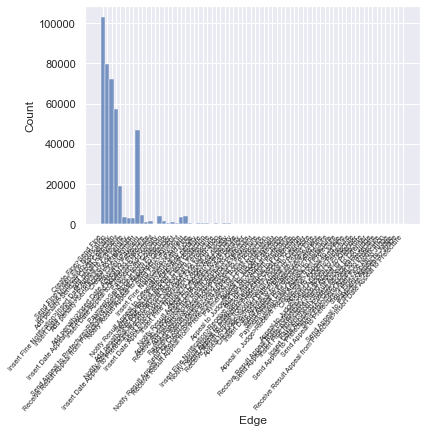

In [102]:
figY = sns.histplot(x=link['edge'], stat="count")
figY.set(xlabel='Edge')
hoverText = mplcursors.cursor(figY, hover=True)
plt.xticks(rotation=50, ha="right", fontsize=7)
plt.show()

In [103]:
# g = sns.FacetGrid(link, col="source",  row="target")
# g = g.map(sns.histplot, 'time')

In [104]:
# to find the top frequent edges
n = 10
link['edge'].value_counts()[:n]

Create Fine>Send Fine                                        103294
Send Fine>Insert Fine Notification                            79683
Insert Fine Notification>Add penalty                          72283
Add penalty>Send for Credit Collection                        57163
Create Fine>Payment                                           46935
Add penalty>Payment                                           18618
Payment>Payment                                                4306
Payment>Add penalty                                            3902
Insert Fine Notification>Payment                               3890
Insert Fine Notification>Insert Date Appeal to Prefecture      3324
Name: edge, dtype: int64

In [105]:
link.to_csv(roadTrafficPath+'road_all_filtered_more_than_0_formated.csv', sep=',', index=False)